In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df_data_general = pd.read_csv('../../data/data_general.csv')

In [4]:
columns_selected = ['AVG_BET_std',
        'INITIAL_AMOUNT_std', 'GAMES_PLAYED_TOTAL_std',
        'GAMES_WON_TOTAL_std', 'Rango_Edad_le']
df_data_general = df_data_general[df_data_general['Cluster'] == 0]
df_data_selected = df_data_general[columns_selected]

# Linear Regression

In [5]:
pca = PCA(n_components=2)
components = pca.fit_transform(df_data_selected)
df_data_selected['PCA1'] = components[:, 0]
df_data_selected['PCA2'] = components[:, 1]

/var/folders/ld/2yb_9mvs5t90r3x4r3v3btbc0000gn/T/ipykernel_4120/3727481083.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_selected['PCA1'] = components[:, 0]
/var/folders/ld/2yb_9mvs5t90r3x4r3v3btbc0000gn/T/ipykernel_4120/3727481083.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_selected['PCA2'] = components[:, 1]


In [6]:
lr = LinearRegression()
X = df_data_selected[['PCA1']]
y = df_data_selected['PCA2']
lr.fit(X, y)

LinearRegression()

In [7]:
y_hat = lr.predict(X)

In [8]:
r2_score(y, y_hat)

np.float64(2.220446049250313e-16)

Text(0.5, 1.0, 'Linear Regression Cluster 0. R2 2.220446049250313e-16')

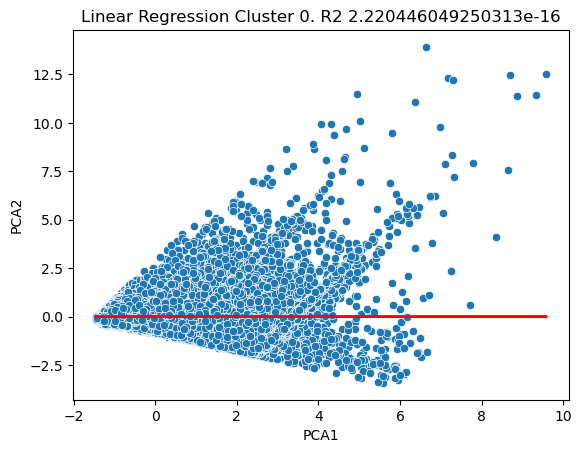

In [9]:
sns.scatterplot(x=df_data_selected['PCA1'], y=y)
plt.plot(X, y_hat, color='red')
plt.title(f"Linear Regression Cluster 0. R2 {r2_score(y, y_hat)}")

In [10]:
import statsmodels.api as sm

X = sm.add_constant(X)  # agregar intercepto
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   PCA2   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                -1.154e-09
Date:                Sat, 23 Aug 2025   Prob (F-statistic):               1.00
Time:                        09:25:35   Log-Likelihood:            -1.0295e+05
No. Observations:              112380   AIC:                         2.059e+05
Df Residuals:                  112378   BIC:                         2.059e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        7.06e-17      0.002   3.91e-14      1.0